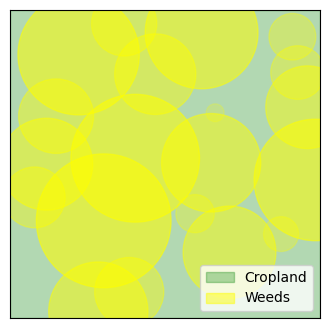

In [73]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# 画一个绿色的矩形代表农田，在其中画出按规则排列的绿点代表作物
fig, ax = plt.subplots(figsize=(4, 4))

# 画一个绿色的矩形代表农田
farm_patch = plt.Rectangle((0, 0), 1, 1, color='green', alpha=0.3, label='Cropland')
ax.add_patch(farm_patch)

# 存储已有的杂草区域
weeds = []

# 画出随机大小、随机透明度的黄色圆形代表杂草区域
for i in range(20):
    while True:
        x = random.random()  # 确保圆心在显示范围内
        y = random.random()  # 确保圆心在显示范围内
        r = random.random() * 0.2 + 0.02
        alpha = 0.3
        
        # 检查新生成的杂草区域是否与已有的杂草区域重叠
        overlap = False
        for weed in weeds:
            distance = np.sqrt((x - weed[0])**2 + (y - weed[1])**2)
            if distance < (r):
                overlap = True
                break
        
        if not overlap:
            weeds.append((x, y, r))
            circle = plt.Circle((x, y), r, color='yellow', alpha=math.sqrt(r)*1.2, label='Weeds' if i == 0 else "")
            ax.add_patch(circle)
            break

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# 增加图例
ax.legend()

plt.show()


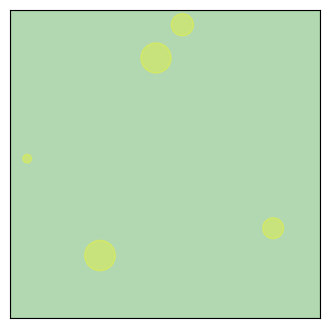

In [74]:
# 类似上面代码的demo，我想用扩散方式模拟杂草生长的过程
# 画一个绿色的矩形代表农田
fig, ax = plt.subplots(figsize=(4, 4))
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='green', alpha=0.3))

# 存储已有的杂草区域
weeds = []

# 画出随机大小、随机透明度的黄色圆形代表杂草区域
for i in range(5):
    while True:
        x = random.random()  # 确保圆心在显示范围内
        y = random.random()  # 确保圆心在显示范围内
        r = random.random() * 0.05
        alpha = 0.3
        
        # 检查新生成的杂草区域是否与已有的杂草区域重叠
        overlap = False
        for weed in weeds:
            distance = np.sqrt((x - weed[0])**2 + (y - weed[1])**2)
            if distance < (r):
                overlap = True
                break
        
        if not overlap:
            weeds.append((x, y, r))
            circle = plt.Circle((x, y), r, color='yellow', alpha=alpha)
            ax.add_patch(circle)
            break
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

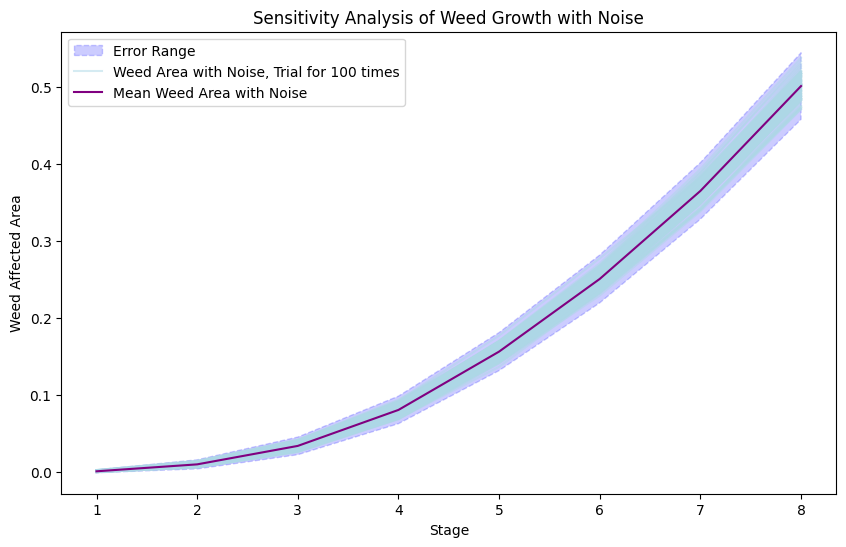

In [75]:
def simulate_weed_growth_with_noise(num_stages, num_experiments, noise_level=0.1):
    all_areas = []

    for _ in range(num_experiments):
        weeds = []
        areas = []

        for stage in range(1, num_stages + 1):
            # 将已有的杂草区域全部扩大（r增大）
            for i in range(len(weeds)):
                x, y, r = weeds[i]
                noise = random.uniform(1 - noise_level, 1 + noise_level)
                if r < 0.08:
                    r += 0.02 * noise
                else:
                    r += 0.01 * noise
                weeds[i] = (x, y, r)

            # 增加新的杂草区域
            for i in range(3):
                while True:
                    x = random.random()  # 确保圆心在显示范围内
                    y = random.random()  # 确保圆心在显示范围内
                    r = random.random() * 0.02

                    # 检查新生成的杂草区域是否与已有的杂草区域重叠
                    overlap = False
                    for weed in weeds:
                        distance = np.sqrt((x - weed[0]) ** 2 + (y - weed[1]) ** 2)
                        if distance < (r + weed[2]):
                            overlap = True
                            break

                    if not overlap:
                        weeds.append((x, y, r))
                        break

            # 计算当前阶段的杂草总面积
            total_area = sum([math.pi * r**2 for _, _, r in weeds])
            areas.append(total_area)

        all_areas.append(areas)

    return np.array(all_areas)

# 设置实验参数
num_stages = 8
num_experiments = 100

# 进行多次随机实验
all_areas_with_noise = simulate_weed_growth_with_noise(num_stages, num_experiments)

# 计算平均面积和误差范围
mean_areas_with_noise = np.mean(all_areas_with_noise, axis=0)
std_areas_with_noise = np.std(all_areas_with_noise, axis=0)

# 绘制结果
stages = np.arange(1, num_stages + 1)

plt.figure(figsize=(10, 6))
# plt.plot(stages, mean_areas_with_noise, label='Mean Weed Area with Noise', color='blue')
plt.fill_between(stages, mean_areas_with_noise - 3*std_areas_with_noise, mean_areas_with_noise + 3*std_areas_with_noise, color='blue', alpha=0.2, linestyle='--', label='Error Range')

# 绘制多条随机仿真结果
for i in range(100):  # 画出10条随机仿真结果
    plt.plot(stages, all_areas_with_noise[i], color='lightblue', alpha=0.5)
plt.plot(stages, all_areas_with_noise[i], color='lightblue', alpha=0.5, label='Weed Area with Noise, Trial for 100 times')
    
plt.plot(stages, mean_areas_with_noise, label='Mean Weed Area with Noise', color='purple')

plt.xlabel('Stage')
plt.ylabel('Weed Affected Area')
plt.title('Sensitivity Analysis of Weed Growth with Noise')
plt.legend()
plt.show()